# Question 1: Linear and non-linear regularized regression (50pts)

## 1.1 Linear Regression

### 1.1.1 
The parameters $\theta = \{w,b\}, w \in {\rm I\!R}^d, b \in {\rm I\!R}$.

### 1.1.2 
\begin{align}
\hat {R} & = \sum_{i=0}^n L(f_{\theta}(x_i), t_i) \\
& = \sum_{i=0}^n (f(x_i) - t_i)^2 \\
& = \sum_{i=0}^n (w^Tx_i + b - t_i)^2
\end{align}

### 1.1.3
The optimal values for our parameters $\ w $ and $\ b$ are given by finding which parameters give the minimum of the $\ \hat R$ function, through the set of data $\ D_n$.

\begin{align}
\theta ^* & = argmin_{\theta} \hat R (f_{\theta}, D_n) \\
(w ^*, b ^*) &= argmin_{\{w,b\}} \biggl( \sum_{i=0}^n (w^Tx_i + b - t_i)^2 \biggr) \\
\end{align}

Where $\ (w, b)^* $ are the parameters that minimize the quadratic loss.

### 1.1.4
We can find the optimal parameters with gradient descent. If $\ \hat R$ is our objective function, the optimal $\ \theta$ parameters will be found by finding the partial derivatives of our objective function :

\begin{align}
\frac {\partial \hat R}{\partial w} & = \frac {\partial}{\partial w} \sum_{i=0}^n (w^Tx_i + b - t_i)^2\\
& =  \frac {\partial}{\partial w} \sum_{i=0}^n (w^T)^2x_i^2 + b^2 - t_i^2 + 2w^Tx_ib - 2bt_i \\
& =  \sum_{i=0}^n 2x_i(w^Tx_i + b - t_i)
\end{align}

\begin{align}
\frac {\partial \hat R}{\partial b} & =  \frac {\partial}{\partial w} \sum_{i=0}^n (w^T)^2x_i^2 + b^2 - t_i^2 + 2w^Tx_ib - 2bt_i \\
& =  \sum_{i=0}^n 2(w^Tx_i +b -t_i) \\
\end{align}

### 1.1.5 
# <span style="color:red">Not sure</span> 
The error is the distance between the prediction from our model for a specefic 'X' value and the target. In the gradient formulation, we actually see the exact formulation multiplied by 2*X. Since the distance between the predicted value and the target (i.e. the error) is actually a direction: the bigger the error, the steeper the gradient is. 

## 1.2 Ridge Regression

### 1.2.1 
\begin{align}
\tilde R & = \sum_{i=0}^n (w^Tx_i + b - t_i)^2 + \sum_{k=0}^d \lambda w_k^2 \\
\frac {\partial \tilde R}{\partial w} & = \sum_{i=0}^n 2x_i(w^Tx_i + b - t_i) + \sum_{k=0}^d 2\lambda w_k \\ 
\frac {\partial \tilde R}{\partial b} & = \sum_{i=0}^n 2(w^Tx_i +b -t_i) \\ 
\end{align}

The gradiant of the regularized empirical risk differs from that of the unregularized one only in the $\ w $ partial derivative, since the regularization term ignores the bias parameter. You add the following term : 
\begin{equation} 2\lambda \sum_{k=1}^{d}w_k \end{equation}

### 1.2.2
The gradient descent algortihm calculates the optimal parameters by using an iterative method. After each iteration (*itr*), the gradient function is calculated again to evaluate the new direction of the steepest slope (in order to go downhill). The new parameters are obtained from the gradient value modified by the hyper-parameter *eta*, called *learning rate* or *step size*. It controls the size of the steps towards the optimal parameter. The algorithm stops when a maximum number of iterations (nb_steps) has been achieved. 

* Init w and b
* itr $\leftarrow$ 0
* Init nb_steps
* Init $\ \eta$ (the step size)
* while itr < nb_steps
 * w $\leftarrow$ w - $\ \eta$$\frac {\partial \hat R}{\partial w}$ 
 * b $\leftarrow$ b - $\ \eta$$\frac {\partial \hat R}{\partial b}$ 
 * itr $\leftarrow$ itr + 1

### 1.2.3
$ \underline {if b=0} $

\begin{equation*}
\tilde R  = \begin{bmatrix}
(w_{(1)}x_{(1,1)}-t_{(1)})^2 + w_{(1)}^2 & \cdots &  (w_{(d)}x_{(1,d)}-t_{(1)})^2 + w_{(d)}^2 \\
\vdots & \ddots & \vdots \\
(w_{(1)}x_{(n,1)}-t_{(n)})^2 + w_{(1)}^2 & \cdots & (w_{(d)}x_{(n,d)}-t_{(n)})^2 + w_{(d)}^2 \\
\end{bmatrix} 
\end{equation*}

\begin{equation*}
\frac {\partial \tilde R}{\partial w}  = \begin{bmatrix}
2x_{(1,1)}(w_{(1)}x_{(1,1)} - t_{(1)}) + 2\lambda w_{(1)} & \cdots & 2x_{(1,d)}(w_{(d)}x_{(1,d)} - t_{(1)})+ 2\lambda w_{(d)} \\
\vdots & \ddots & \vdots \\
2x_{(n,1)}(w_{(1)}x_{(n,1)} - t_{(n)}) + 2\lambda w_{(1)} & \cdots & 2x_{(n,d)}(w_{(d)}x_{(n,d)} -t_{(n)}) + 2\lambda w_{(d)} \\
\end{bmatrix} 
\end{equation*}

\begin{equation*}
\frac {\partial \tilde R}{\partial b}  = 0
\end{equation*}

### 1.2.4
If we try and solve one of the derivatives when n=1 and d=1 for exemple, we would get:

\begin{align}
2x(wx-t)+2 \lambda w & = 0 \\
2x^2w-2xt+2 \lambda w & = 0 \\
2x^2w+2 \lambda w & = 2xt \\ 
w & = \frac {xt}{x^2+ \lambda} \\
\end{align}

The resulting matrix would then be:

\begin{equation*}
w  = \begin{bmatrix}
\frac {x_{(1,1)}t_{(1)}}{x_{(1,1)}^2+ \lambda} & \cdots & \frac {x_{(1,d)}t_{(1)}}{x_{(1,d)}^2+ \lambda} \\
\vdots & \ddots & \vdots \\
\frac {x_{(n,1)}t_{(n)}}{x_{(n,1)}^2+ \lambda} & \cdots & \frac {x_{(n,d)}t_{(n)}}{x_{(n,d)}^2+ \lambda} \\
\end{bmatrix} 
\end{equation*}

Which in turn is equivalent to the following equation:

\begin{equation*}
w  = (X^TX+\lambda  I)^{-1} X^Tt
\end{equation*}

When $\lambda =0$ we get an equation that resembles the ordinary least squares equation: $ (X^TX)^{-1}(X^Tt) $ or $\frac {xt}{x^2}$ for a single element of the matrix.
Also, when d>n we will find an equation wich will solve all of our training points. This means we will perfectly fit our training set. This sort of capacity would result in overfitting our model. 

## 1.3 Regression with a fixed non-linear pre-processing

### 1.3.1 
\begin{equation*}
\hat f(x) = \hat f(\phi(x))= f_{\theta}([x, x^2,...,x^k]) = w_1x+w_2x^2+...+w_kx^k +b
\end{equation*}

### 1.3.2
\begin{equation*}
w = \begin{bmatrix}
w_1 \\
w_2 \\
\cdots \\
w_k \\
\end{bmatrix}\\
w \in {\rm I\!R}^k  \text { and } b \in {\rm I\!R}
\end{equation*}


### 1.3.3
$\underline {\text {When } d=2, \phi_{poly1}(x)}$ 
\begin{equation*}
\tilde x = \varphi (x) = \varphi ([x_1, x_2]) = [x_1, x_2] \\
f(x) = w^T\tilde x+b=w_1x_1 + w_2x_2 +b
\end{equation*}


$\underline {\text {When } d=2, \phi_{poly2}(x)}$ 
\begin{equation*}
\tilde x = [x_1, x_2, x_1^2, x_2^2, x_1x_2] \\
f(x) = w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2 + b
\end{equation*}


$\underline {\text {When } d=2, \phi_{poly3}(x)}$ 
\begin{equation*}
\tilde x = [x_1, x_2, x_1^2, x_2^2, x_1x_2, X_1^3, x_2^3, x_1^2x_2, x_2^2x_1] \\
f(x) = w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2 + w_6x_1^3 + w_7x_2^3 + w_8x_1^2x_2 + w_9x_2^2x_1 + b
\end{equation*}

### 1.3.4
# <span style="color:red">TODO relation with d and k</span>

# Question 2: Pratical part (50 pts)

In [2]:
%pylab inline
import numpy as np
import random
import pylab
import time
import matplotlib.pyplot as plt
import sklearn.metrics as met
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


C:\Users\JP\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 2.1

In [31]:
class regression_gradient:
    
    def __init__(self, lamda = 1):
        """
        Class constructor initializing the attributes.
        Parameters
        ----------
        lamda : float
            lamda is the regularization hyperparameter
            default value is 1
        """
        self.lamda = lamda
        self.scoreTr = 0
        self.scoreTe = 0
        self.R_tr = 0
        self.R_te = 0
        
        
    def train(self, train_data, train_labels, eta = 1, epsilon = 0.001, max_epoch = 10):
        """
        Model training method learning the parameters.
        Parameters
        ----------
        train_data : array of n x d
            training examples and labels.
        eta : float
            step size
            default value is 1.
        max_epoch : float
            maximum number of epochs for our SGD training
            default value is 10.
        """
        self.eta = eta
        self.epsilon = epsilon
        # -------------------------------
        # 1) Parameter Initialization
        
        if isinstance(train_data[0], (np.ndarray)):
            self.weight = zeros(train_data.shape[1]) #initialize the weights to a vector of zeros of size dx1
        else:
            self.weight = 0
            
        self.bias = 0 #initialize the bias
        # -------------------------------
        # 2) Training
        # We use Stochastic Gradient Descent to train the parameters we just initialized
        # Therefore, we go through a loop for several epochs to learn the parameters
        print("Training...")
        epoch = 0
        
        while (epoch < max_epoch): #we keep looping while condition is true
            
            # We loop through all samples in our train_data. Once we went through every sample, we re-start an iteration
            # (epoch) throughout the whole set.
            
            for (i,ex) in enumerate(train_data):
                # Initialize local variables
                
                dRdw = 0
                dRdb = 0
                
                if isinstance(ex,np.ndarray):
                    dRdw = (2 * (ex*(np.matmul(ex,np.transpose(self.weight))+self.bias-train_labels[i]))
                            +2 * self.lamda/train_data.shape[0]*np.linalg.norm(self.weight))
                    dRdb = (2 * (np.matmul(ex,np.transpose(self.weight))+self.bias-train_labels[i]))
                elif isinstance(ex,(np.float64, np.int32, float, int)):
                    dRdw = (2 * (ex*((ex*np.transpose(self.weight))+self.bias-train_labels[i]))
                            +2 * self.lamda/train_data.shape[0]*self.weight) # Because weight is just a scalar we dont use lg.norm
                    dRdb = (2 * ((ex*np.transpose(self.weight))+self.bias-train_labels[i]))
                if np.any(abs(dRdw) > self.epsilon):
                    weight_temp = self.weight - eta * dRdw
                if (abs(dRdb) > self.epsilon):
                    bias_temp = self.bias - eta * dRdb

                self.weight = weight_temp
                self.bias = bias_temp
            epoch += 1

        print("Training completed with {} epochs".format(max_epoch))
        
        return 
    
    def loss(self, data, data_label):
        """
        Method measuring the quadratic loss.
        Parameters
        ----------
        data : array of n x d
            data to predict the loss on
        data_label : array of n x 1
            label of the test data 
        
        Return
        ----------
        loss over all data : array of n x 1
            quadratic loss for every data
        """
        pred = self.compute_predictions(data, data_label)
        return np.power((pred - data_label),2)
    
    def empiricalRisk(self, data, data_label):
        """
        Method measuring the total reg. empirical risk.
        Parameters
        ----------
        data : array of n x d
            data to predict the loss on
        data_label : array of n x 1
            label of the test data 
        
        Return
        ----------
        regularized empirical risk: scalar
            total regularized empirical risk over the data set
        """
        return np.sum(self.loss(data, data_label) 
                      + np.power(self.lamda*np.linalg.norm(self.weight),2))
        
    def compute_predictions(self, test_data, test_labels): #for a the class of a training model
        """
        Method predicting the labels of test_data.
        Parameters
        ----------
        test_data : array of n x d
            test data.
        test_labels : array of n x 1
            label of the test data 
        
        Return
        ----------
        pred : array of n x 1
            predictions for the test data
        """
        
        pred = np.zeros(test_data.shape[0])
        for (i,ex) in enumerate(test_data):
            if isinstance(ex,np.ndarray):    
                pred[i] = np.matmul(ex,np.transpose(self.weight)) + self.bias
            elif isinstance(ex,(np.float64, np.int32, float, int)):
                pred[i] = (ex*(self.weight)) + self.bias
                
        return pred
    
    ## For the empirical risk error, do we use the regularization term as part of that risk, regarding an already trained model?

## 2.2

In [4]:
def h_x(x):
        """
        h(x) function definition.
        Parameters
        ----------
        x : float
            x is the input if this function

        Return
        ----------
        h(x)
        """
        return np.sin(x) + 0.3*x - 1

D = linspace(-5,5,15)

print (h_x(D))

[-1.54107573 -1.37536734 -1.65470692 -2.13777226 -2.48364425 -2.4184745
 -1.86936361 -1.         -0.13063639  0.4184745   0.48364425  0.13777226
 -0.34529308 -0.62463266 -0.45892427]


## 2.3

Training...
Training completed with 5000 epochs
The regularized empirical risk of the training is 7.325068566712835.


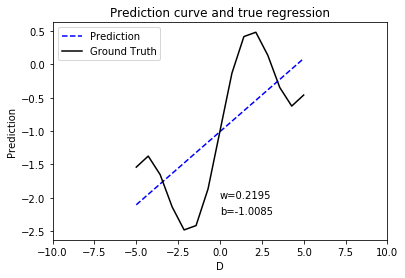

In [5]:
lambda_ = 0
model = regression_gradient(0)
model.train(D, h_x(D), 0.000475, 0.00001, 5000) #Model used for the rest of the problem


interval = linspace(-10,10, 15)

# Training score et test score devraient etre le meme
    
plt.figure(1)
plt.plot(D, model.compute_predictions(D, h_x(D)), 'b--', label = "Prediction")
plt.plot(D, h_x(D), 'k-', label = "Ground Truth")
plt.xlabel("D")
plt.xlim(-10,10)
plt.ylabel("Prediction")
plt.text(0, -2, 'w={0:.4f}'.format(model.weight))
plt.text(0, -2.25, 'b={0:.4f}'.format(model.bias))
plt.title("Prediction curve and true regression")
legend()

print("The regularized empirical risk of the training is {}.".format(model.empiricalRisk(D, h_x(D))))


## 2.4

Model 1 :
Training...
Training completed with 5000 epochs
Model 2:
Training...
Training completed with 5000 epochs
Model 3:
Training...
Training completed with 5000 epochs

The regularized empirical risk for the mode with lambda = 0.01 is 7.325143573357898.

The regularized empirical risk for the mode with lambda = 50 is 1001.3683394673756.

The regularized empirical risk for the mode with lambda = 100 is 2517.0764112012503.


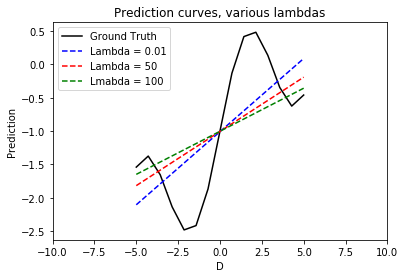

In [6]:
model1 = regression_gradient(0.01)
model2 = regression_gradient(50)
model3 = regression_gradient(100)
print ("Model 1 :")
model1.train(D, h_x(D), 0.000475, 0.00001, 5000)
print ("Model 2:")
model2.train(D, h_x(D), 0.000475, 0.00001, 5000)
print ("Model 3:")
model3.train(D, h_x(D), 0.000475, 0.00001, 5000)
plt.figure(1)
plt.plot(D, h_x(D), 'k-', label = "Ground Truth")
plt.plot(D, model1.compute_predictions(D, h_x(D)), 'b--', label = "Lambda = 0.01")
plt.plot(D, model2.compute_predictions(D, h_x(D)), 'r--', label = "Lambda = 50")
plt.plot(D, model3.compute_predictions(D, h_x(D)), 'g--', label = "Lmabda = 100")
plt.xlabel("D")
plt.ylabel("Prediction")
plt.xlim(-10,10)
plt.title("Prediction curves, various lambdas")
plt.legend()

print("\nThe regularized empirical risk for the mode with lambda = {} is {}.".format(0.01,model1.empiricalRisk(D, h_x(D))))
print("\nThe regularized empirical risk for the mode with lambda = {} is {}.".format(50,model2.empiricalRisk(D, h_x(D))))
print("\nThe regularized empirical risk for the mode with lambda = {} is {}.".format(100,model3.empiricalRisk(D, h_x(D))))

As we can see, as lambda grows, the slope of the prediction regression gets smaller, eventually pointing towards zero. This makes sense since lambda is the regularization hyperparameter. The bigger lambda is, the more penalty is added to bigger weights; the slope corresponds exactly to the weight here.

## 2.5

for lambda = 0.0001
Training...
Training completed with 5000 epochs
for lambda = 0.001
Training...
Training completed with 5000 epochs
for lambda = 0.01
Training...
Training completed with 5000 epochs
for lambda = 0.1
Training...
Training completed with 5000 epochs
for lambda = 1
Training...
Training completed with 5000 epochs
for lambda = 10
Training...
Training completed with 5000 epochs
for lambda = 100
Training...
Training completed with 5000 epochs


Text(0.5,1,'Zoom on smaller hyperparameters')

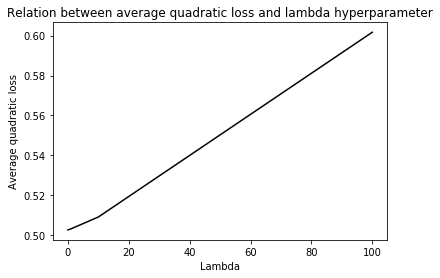

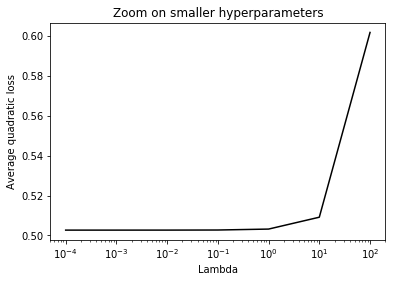

In [7]:
D_test = linspace(-5,5, 100)
Dy_test = h_x(D_test)

vLambda_ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

R_score = zeros(len(vLambda_))

for (i,ex) in enumerate(vLambda_):
    model = regression_gradient(ex)
    print("for lambda = {}".format(ex))
    model.train(D, h_x(D), 0.000475, 0.00001, 5000)
    #model.compute_predictions(D_test, Dy_test)
    R_score[i] = np.mean(model.loss(D_test, Dy_test))
    
plt.figure(1)
plt.plot(vLambda_, R_score, 'k')
plt.ylabel("Average quadratic loss")
plt.xlabel("Lambda")
plt.title("Relation between average quadratic loss and lambda hyperparameter")

plt.figure(2)
plt.plot(vLambda_[0:8], R_score[0:8], 'k')
plt.ylabel("Average quadratic loss")
plt.xlabel("Lambda")
plt.xscale('log')
plt.title("Zoom on smaller hyperparameters")

## 2.6

In [58]:
def phi_tf(data, l):
    """
    phi_tf() function definition.
    Parameters
    ----------
    data : array/matrix
        data is the input of this function
        data will be non-linearly transformed and 
        defined by a new set a features, obtained
        from the original features
    l : integer
        polynomial degree of the transformation
        
    WARNING:
        Works only for 1 dimensional data sets.
    Return
    ----------
    normalized transformed data set new_data
    """
    
    if isinstance(data, (np.float64, np.int32, float, int)):
        raise Exception("data is not an array or matrix!") 
    
    if (l < 1 or l is(np.int32, int)):
        raise Exception("l is either too small or not an integer!")
    
    if isinstance(data[0], (np.float64, np.int32, float, int)):
        new_data = zeros((data.shape[0],l))
        for (i,ex) in enumerate(data):
            for j in range(l):
                new_data[i][j] = np.power(ex,(j+1))
    
    if isinstance(data[0], (np.ndarray)):
        raise Exception("Function still under construction")
        d = data.shape[1]
        new_data = zeros((data.shape[0],l))
        for (i,ex) in enumerate(data):
            for j in range(l):
                new_data[i][j] = np.power(ex,(j+1))
                
    new_data= np.divide((new_data - new_data.min(axis=0)),(new_data.max(axis=0) - new_data.min(axis=0)))

    return new_data

Model with no pre-processing:
Training...
Training completed with 5000 epochs
True risk = 50.270352656542705 

Model with polynomial preprocessing of degree 3:
Training...
Training completed with 10000 epochs
True risk = 17.640397979088522

Model with polynomial preprocessing of degree 9:
Training...
Training completed with 5000 epochs
True risk = 7.730613657844573

Model with polynomial preprocessing of degree 15:
Training...
Training completed with 10000 epochs
True risk = 6.87899440910762

Model with polynomial preprocessing of degree 21:
Training...
Training completed with 10000 epochs
True risk = 6.373246776491686



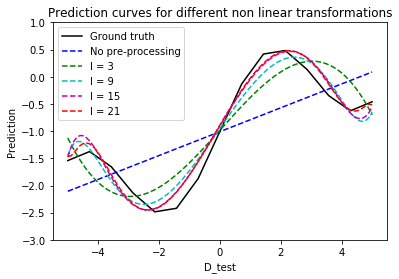

In [109]:
model = regression_gradient(0.01)

plt.figure(1)
plt.plot(D, h_x(D),'k-', label = "Ground truth")
plt.xlabel("D_test")
plt.ylabel("Prediction")
plt.ylim(-3,1)
plt.title("Prediction curves for different non linear transformations")

print ("Model with no pre-processing:")
model.train(D, h_x(D), 0.000475, 0.00001, 5000)
plt.plot(D_test, model.compute_predictions(D_test, h_x(D_test)), 'b--', label = "No pre-processing")
print("True risk = {} \n".format(model.empiricalRisk(D_test,h_x(D_test))))

print("Model with polynomial preprocessing of degree 3:")
x_hat = phi_tf(D,3)
x_hat_test = phi_tf(D_test, 3)
model.train(x_hat, h_x(D), 0.08, 0.00001, 10000)
plt.plot(D_test, model.compute_predictions(x_hat_test, h_x(D_test)), 'g--', label = "l = 3")
print("True risk = {}\n".format(model.empiricalRisk(x_hat_test,h_x(D_test))))

print("Model with polynomial preprocessing of degree 9:")
x_hat = phi_tf(D,9)
x_hat_test = phi_tf(D_test, 9)
model.train(x_hat, h_x(D), 0.01, 0.00001, 5000)
plt.plot(D_test, model.compute_predictions(x_hat_test, h_x(D_test)), 'c--', label = "l = 9")
print("True risk = {}\n".format(model.empiricalRisk(x_hat_test,h_x(D_test))))

print("Model with polynomial preprocessing of degree 15:")
x_hat = phi_tf(D,15)
x_hat_test = phi_tf(D_test, 15)
model.train(x_hat, h_x(D), 0.02, 0.00001, 10000)
plt.plot(D_test, model.compute_predictions(x_hat_test, h_x(D_test)), 'm--', label = "l = 15")
print("True risk = {}\n".format(model.empiricalRisk(x_hat_test,h_x(D_test))))

print("Model with polynomial preprocessing of degree 21:")
x_hat = phi_tf(D,21)
x_hat_test = phi_tf(D_test, 21)
model.train(x_hat, h_x(D), 0.0186, 0.000001, 10000)
plt.plot(D_test, model.compute_predictions(x_hat_test, h_x(D_test)), 'r--', label = "l = 21")
print("True risk = {}\n".format(model.empiricalRisk(x_hat_test,h_x(D_test))))

plt.legend()

## 2.7

When l increases, it becomes easier (with the right step size and number of iterations) to properly fit the model to the true distribution regression of the data. Moreover, we can represent more complex regressions as l increases, since it allows us the use of high degree polynomials. We manage to reduce significantly the risk on $\ D_n$ and on $\ D_{test}$. In this case we know the true distribution of the data, but in another situation we might not know it; using too complex model (increasing l too much) to better fit our training data will most of the time result in overfitting.